### Histogramas
Un histograma es una representación gráfica que organiza un conjunto de datos en intervalos, mostrando la frecuencia de los datos dentro de cada intervalo. En matplotlib, los histogramas se crean utilizando la función hist(). Los histogramas son especialmente útiles para visualizar la distribución de un conjunto de datos y comprender mejor su estructura, como la forma, la dispersión y la presencia de valores atípicos.

    Bins (Contenedores): Los datos se agrupan en intervalos llamados "bins". Cada bin representa un rango de valores, y la altura del bin muestra la frecuencia (el número de observaciones) de los datos que caen dentro de ese rango.
    
    Frecuencia: La cantidad de datos que caen dentro de cada bin.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
data = np.random.randn(1000)

# Crear un histograma
plt.hist(data, bins=30, edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Datos Aleatorios')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [ ]:
# histogramas con subplots. Podemos combinar los histogramas con la técnica de subploting 
# que vimos anteriormente.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

# nos interesa principalmente cómo se ve la distribución uniforme. Luego podemos iterar a través de una lista de cuatro
# valores diferentes: 10, 100, 1,000 y 10,000. Y obtendremos muestras usando NumPy.

# iterar a través de cada eje
for n in range(0, len(axs)):

    # obtener una cantidad de muestras, incrementando exponencialmente
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)

    # y graficar esa muestra
    axs[n].hist(sample)

    # establecer un título útil
    axs[n].set_title(f'n={sample_size}')


Si miramos de cerca, podemos ver que las barras del gráfico de 10,000 muestras son en realidad más anchas que las del gráfico de 10 o 100 muestras. ¿Qué está pasando aquí?

Por defecto, el histograma en Matplotlib usa diez bins, es decir, diez barras diferentes. Aquí creamos un eje x compartido, y a medida que muestreamos más de la distribución, es más probable que obtengamos valores atípicos más alejados de nuestra media. Así, diez bins para n=10 como mucho capturan diez valores únicos, mientras que para n=10,000, muchos valores tienen que combinarse en un solo bin. Hagamos la misma función con los bins establecidos en 100.

In [ ]:
# repetir con el número de bins establecido en 100

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title(f'n={sample_size}')


¿Cómo afectan los bins a la comprensión?

Podemos comparar esta cuestión con el uso de estadísticas agregadas como la media y la desviación estándar para describir una muestra. Estas estadísticas proporcionan una visión general, pero pueden no capturar todos los detalles o tendencias subyacentes en los datos. De manera similar, un histograma con demasiados bins puede dejar de ser útil para interpretar la distribución de datos de manera efectiva.

Al crear histogramas, es importante elegir el número de bins adecuado. Si tienes demasiados bins, el histograma puede mostrar detalles excesivos y poco útiles, mientras que con muy pocos bins, puedes perder información importante sobre la distribución. La elección del número de bins debe equilibrar la necesidad de ver detalles finos y la capacidad de interpretar las tendencias generales en los datos.

Sabiendo esto podemos introducir el concepto de granularidad:

    Granularidad Coarse (Gruesa): Menos bins, donde los datos se agrupan en intervalos más amplios. Esto da una visión general de la distribución, pero puede ocultar detalles.

    Granularidad Fine (Fina): Más bins, donde los datos se agrupan en intervalos más estrechos. Esto muestra detalles más precisos de la distribución, pero puede ser menos útil si el número de bins es demasiado alto.

### GridSpec

En matplotlib contamos con una función que nos permite un diseño más flexible llamado GridSpec para subplots. GridSpec te permite asignar ejes a través de varias celdas en una cuadrícula.

Por ejemplo, vamos a crear un gráfico de dispersión donde los valores de y provienen de la distribución normal y los valores de x provienen de una distribución aleatoria.

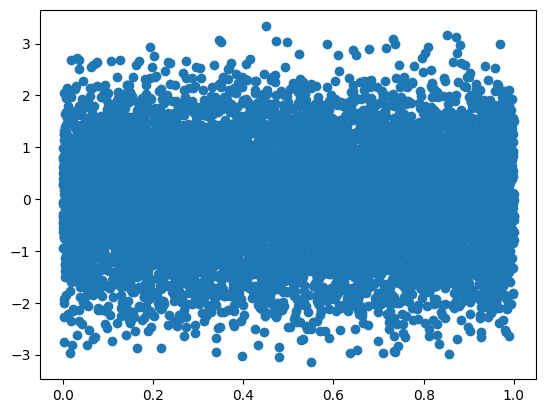

In [7]:
# se generan dos conjuntos de datos aleatorios: Y sigue una distribución normal, 
# y X una distribución uniforme aleatoria.
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# creamos un gráfico de dispersión
plt.scatter(X, Y)

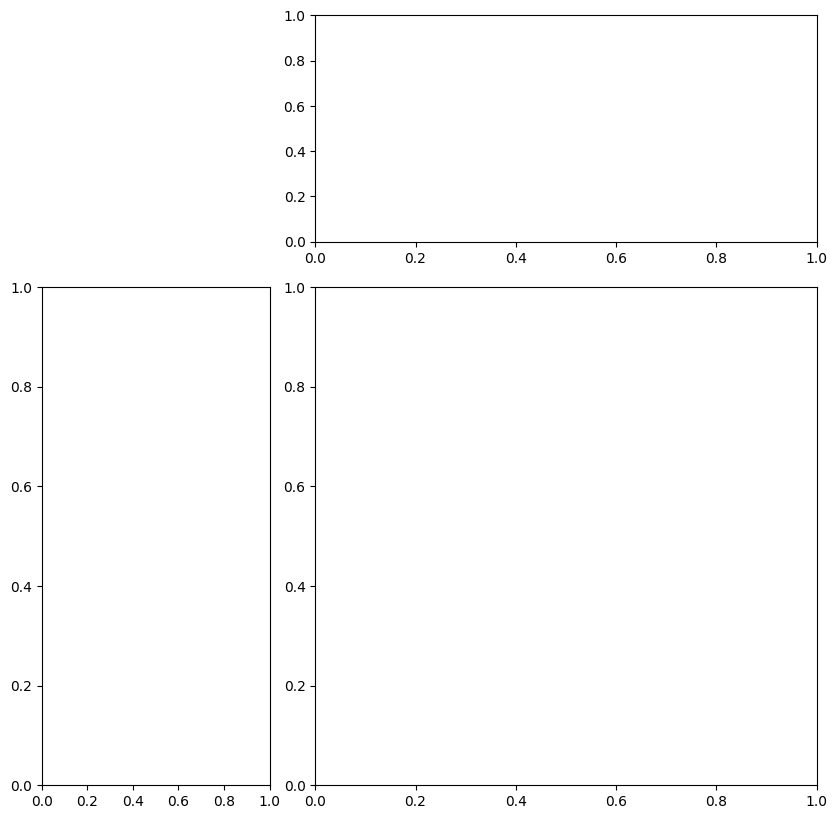

In [8]:
# importamos GridSpec de matplotlib.gridspec para crear una cuadrícula flexible de subplots
import matplotlib.gridspec as gridspec

# creamos una figura de tamaño 10x10 y se define una cuadrícula de 3x3
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# top_histogram ocupa la primera fila (0) y las columnas desde la segunda columna en adelante (1:).
# side_histogram ocupa todas las filas a partir de la segunda fila (1:) y solo la primera columna (0).
# lower_right ocupa todas las filas a partir de la segunda fila (1:) y todas las columnas a partir de la segunda columna (1:).
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

(array([  1.,   1.,   0.,   2.,   1.,   0.,   1.,   7.,   0.,   6.,   5.,
          4.,   7.,   6.,  11.,  11.,  13.,  19.,  19.,  20.,  23.,  27.,
         38.,  39.,  68.,  50.,  82.,  77., 108., 100., 110., 113., 142.,
        131., 152., 173., 197., 186., 234., 201., 243., 232., 269., 324.,
        291., 275., 319., 282., 287., 309., 269., 273., 289., 281., 244.,
        270., 254., 266., 223., 228., 233., 204., 199., 160., 167., 154.,
        143., 112., 110.,  98.,  82.,  73.,  57.,  64.,  62.,  48.,  37.,
         19.,  30.,  32.,  18.,  18.,  13.,  10.,   8.,   8.,   6.,   4.,
          4.,   3.,   3.,   2.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,
          1.]),
 array([-3.66526519, -3.59063157, -3.51599795, -3.44136433, -3.36673071,
        -3.29209709, -3.21746347, -3.14282984, -3.06819622, -2.9935626 ,
        -2.91892898, -2.84429536, -2.76966174, -2.69502812, -2.6203945 ,
        -2.54576088, -2.47112726, -2.39649363, -2.32186001, -2.24722639,
        -2.17259277, -2.09

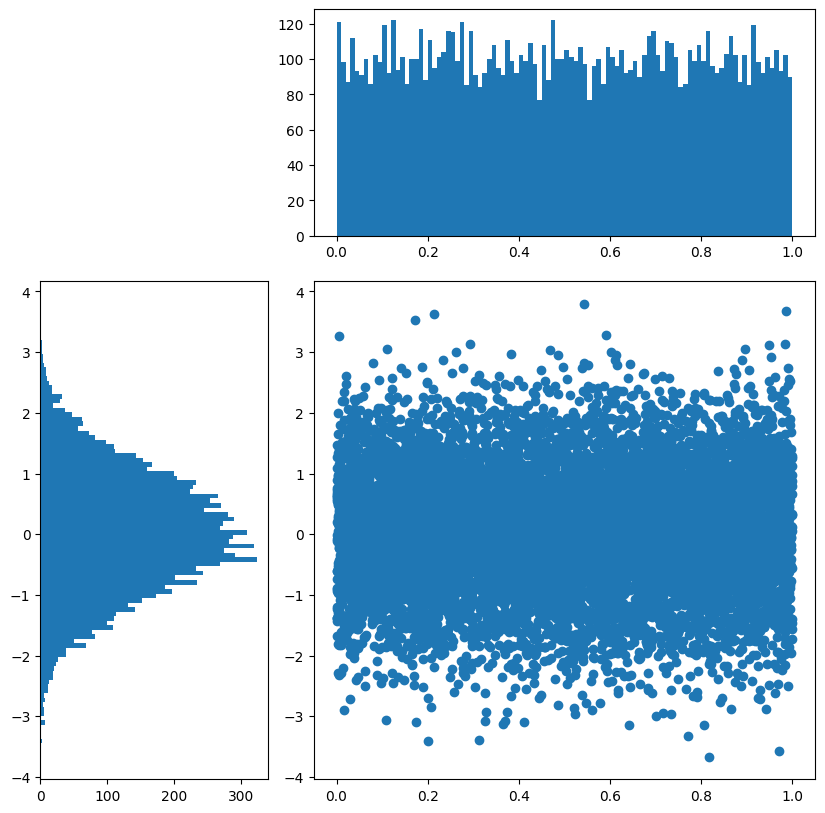

In [10]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# lower_right muestra el gráfico de dispersión.
# top_histogram muestra un histograma de los datos X con 100 bins.
# side_histogram muestra un histograma horizontal de los datos Y con 100 bins.
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal')